In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('classic')
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
rng = np.random.RandomState(0)
x= np.linspace(0, 10 ,500)
y = np.cumsum(rng.randn(500,6), 0)

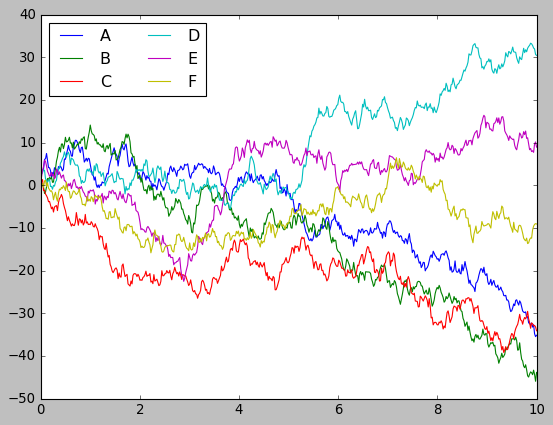

In [3]:
plt.plot(x, y)
plt.legend("ABCDEF", ncol = 2, loc = 'upper left')

seaborn

In [3]:
import seaborn as sns
sns.set()

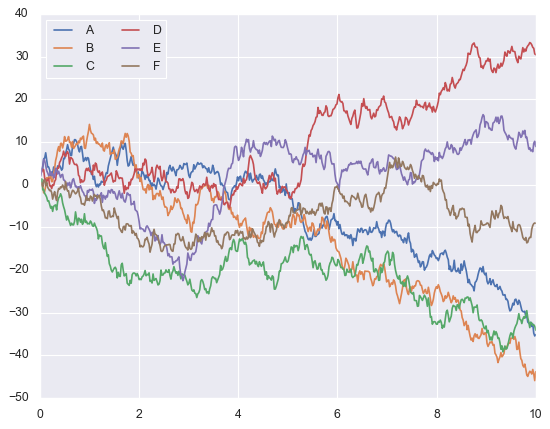

In [5]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol = 2, loc = 'upper left')

# Seaborn 

AttributeError: 'Rectangle' object has no property 'normed'

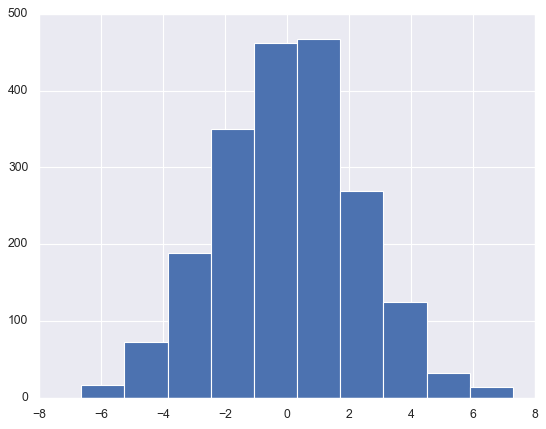

In [7]:
data = np.random.multivariate_normal([0,0],[[5,2],[2,2]], size = 2000)
data = pd.DataFrame(data, columns = ['x', 'y'])

for col in 'xy':
    plt.hist(data[col], normed = True, alpha = 0.5)

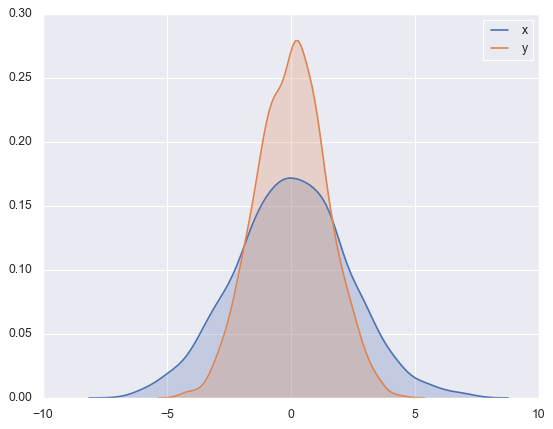

In [8]:
for col in 'xy':
    sns.kdeplot(data[col], shade = True)

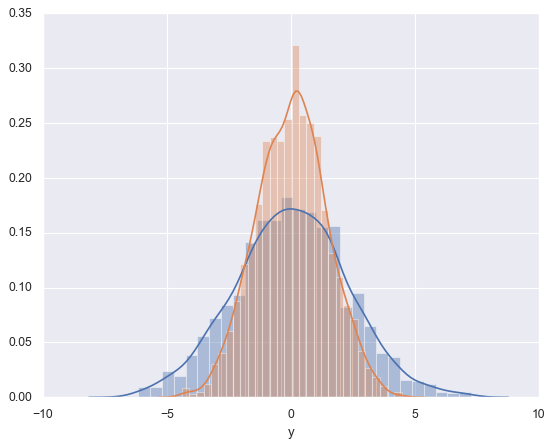

In [12]:
sns.distplot(data['x'])
sns.distplot(data['y'])

D:\ANACONDA\envs\venv\lib\site-packages\seaborn\distributions.py:690: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


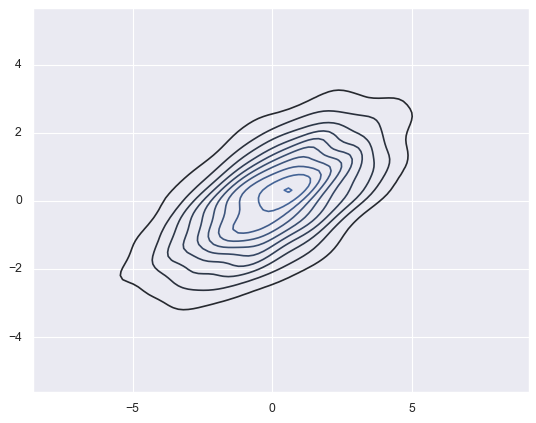

In [13]:
sns.kdeplot(data)

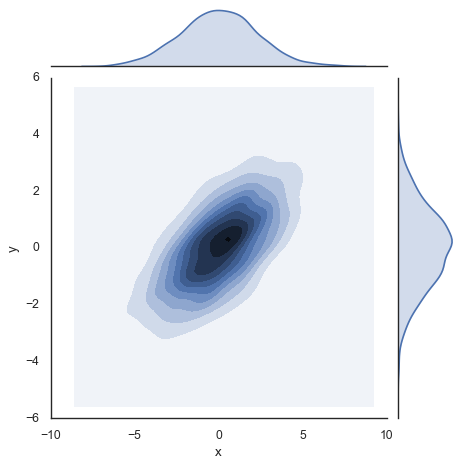

In [14]:
with sns.axes_style('white'):
    sns.jointplot('x','y',data, kind = 'kde')

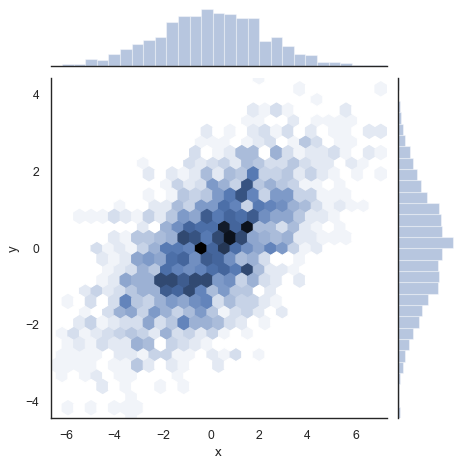

In [16]:
with sns.axes_style('white'):
    sns.jointplot('x', 'y', data, kind = 'hex')

## Pair plots

In [17]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


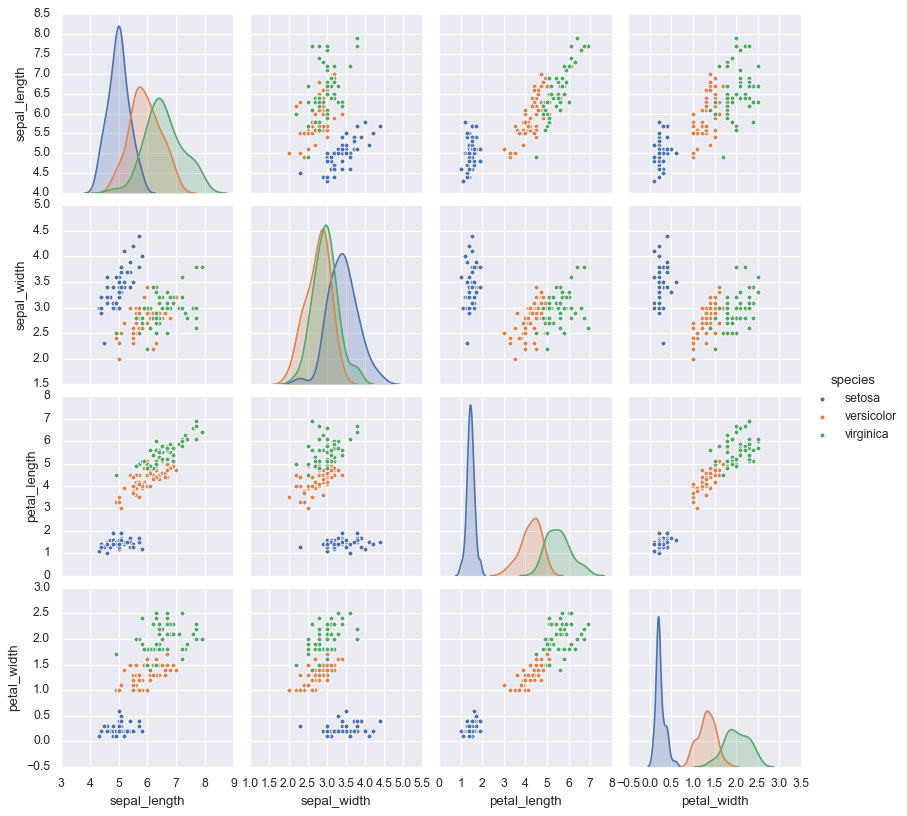

In [19]:
sns.pairplot(iris, hue = 'species', height = 2.5)

In [20]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## catplot(factorplot) 

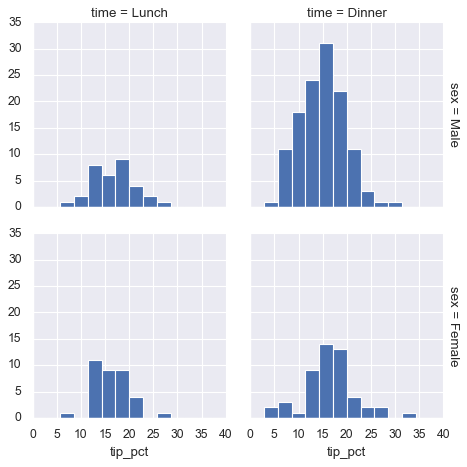

In [24]:
tips['tip_pct'] = 100*tips['tip']/tips['total_bill']
grid = sns.FacetGrid(tips, row = 'sex', col = 'time', margin_titles = True)
grid.map(plt.hist, 'tip_pct', bins = np.linspace(0 ,40, 15));

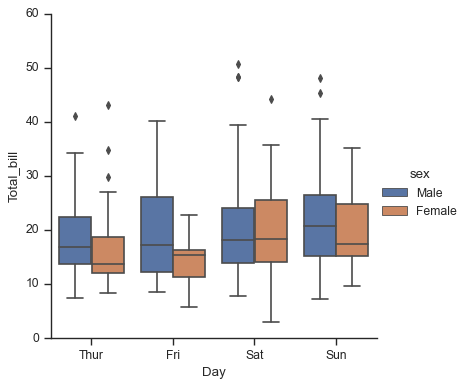

In [26]:
with sns.axes_style(style = 'ticks'):
    g = sns.catplot('day', 'total_bill', 'sex', data = tips, kind = 'box')
    g.set_axis_labels('Day', 'Total_bill')

## jointplot

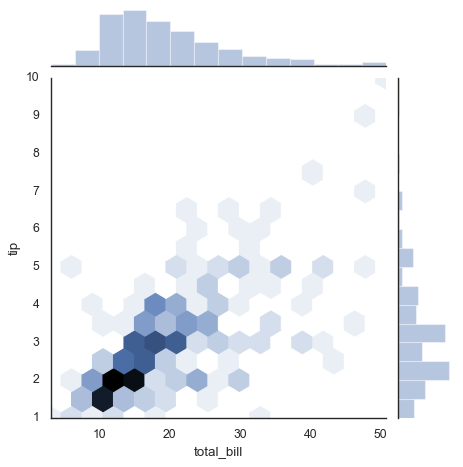

In [27]:
with sns.axes_style('white'):
    sns.jointplot('total_bill', 'tip', data = tips, kind = 'hex')

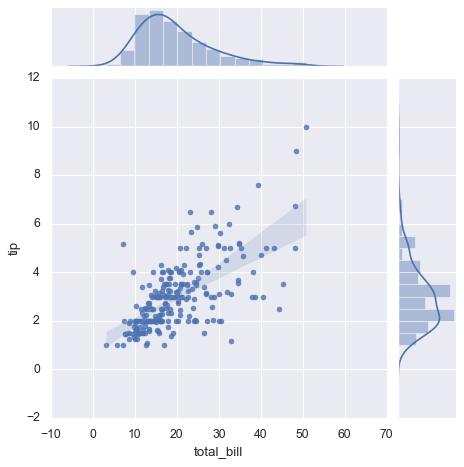

In [28]:
sns.jointplot('total_bill', 'tip', data = tips, kind = 'reg');


In [5]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


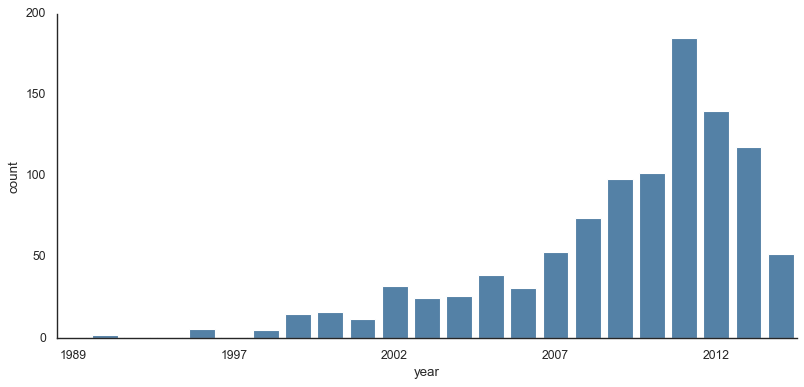

In [9]:
with sns.axes_style('white'):
    g=sns.catplot('year', data = planets, aspect = 2, 
                    kind = 'count', color = 'steelblue')
    g.set_xticklabels(step = 5)

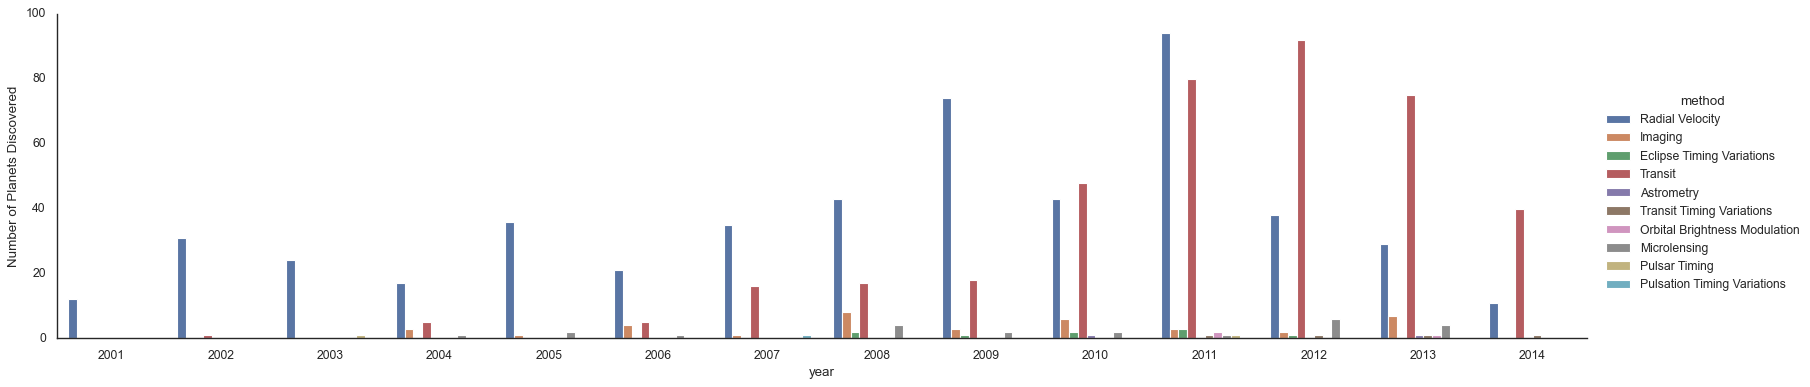

In [14]:
with sns.axes_style('white'):
    g = sns.catplot('year', data = planets, aspect = 4.0,
                   kind = 'count', hue = 'method', order = range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

## Explore Marathon Finishing Time


In [5]:
!curl -O https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  836k  100  836k    0     0   836k      0  0:00:01 --:--:--  0:00:01 1728k


In [6]:
data = pd.read_csv('marathon-data.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [7]:
data.dtypes # string as object

age        int64
gender    object
split     object
final     object
dtype: object

In [8]:
import datetime

def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

data = pd.read_csv('marathon-data.csv',
                   converters={'split':convert_time, 'final':convert_time})
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [44]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [9]:
data['split_sec'] = data['split'].astype('timedelta64[s]') 
data['final_sec'] = data['final'].astype('timedelta64[s]')
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,01:05:38,02:08:51,3938.0,7731.0
1,32,M,01:06:26,02:09:28,3986.0,7768.0
2,31,M,01:06:49,02:10:42,4009.0,7842.0
3,38,M,01:06:16,02:13:45,3976.0,8025.0
4,31,M,01:06:32,02:13:59,3992.0,8039.0


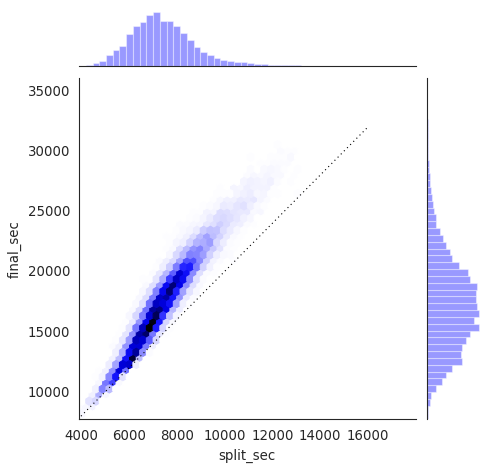

In [11]:
with sns.axes_style('white'):
    g = sns.jointplot('split_sec', 'final_sec', data, kind = 'hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                   np.linspace(8000, 32000), ':k')

In [12]:
data['split_frac']=1-2*data['split_sec']/data['final_sec']
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842


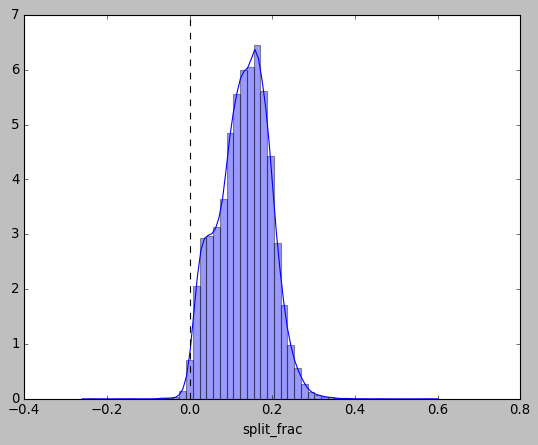

In [16]:
sns.distplot(data['split_frac'], kde = True)
plt.axvline(0, color = 'k', linestyle = '--');

In [19]:
sum(data['split_frac']<0)

251

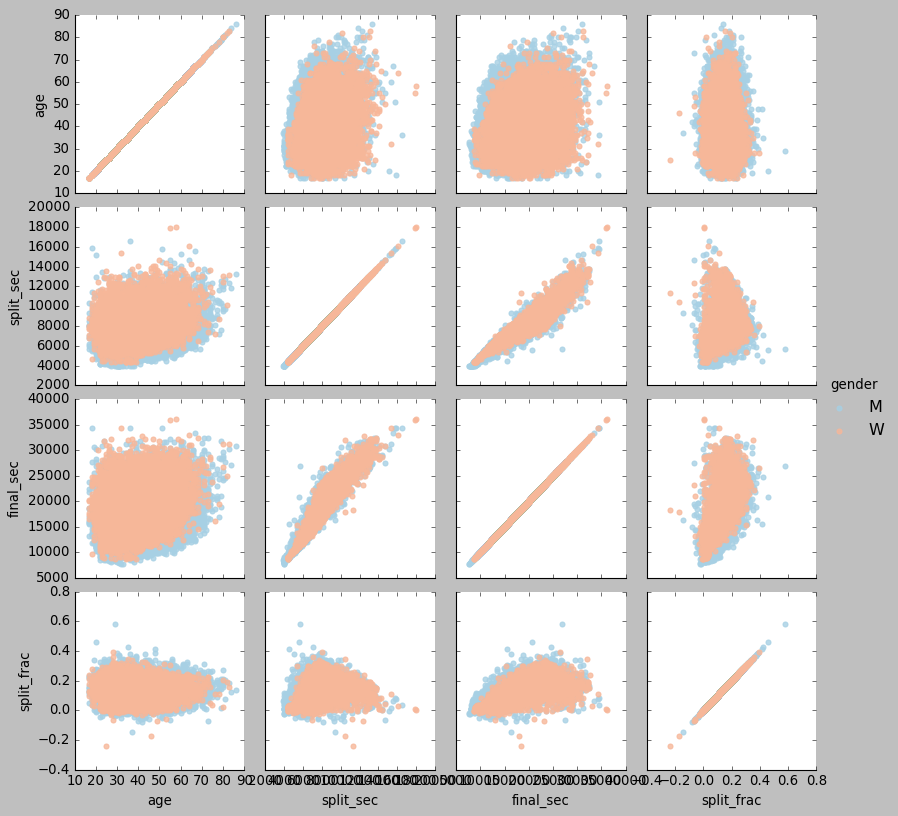

In [20]:
g = sns.PairGrid(data, vars = ['age', 'split_sec', 'final_sec', 'split_frac'],
                hue = 'gender', palette = 'RdBu_r')
g.map(plt.scatter, alpha = 0.8)
g.add_legend()

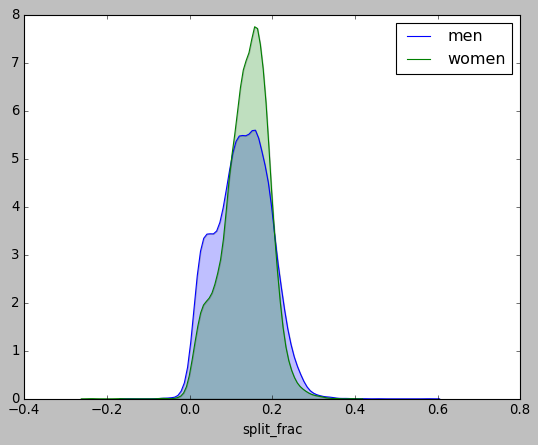

In [21]:
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', shade=True)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', shade=True)
plt.xlabel('split_frac');

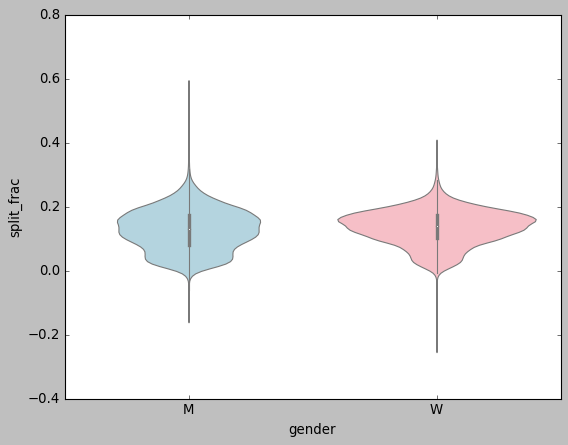

In [22]:
sns.violinplot("gender", "split_frac", data=data,
               palette=["lightblue", "lightpink"]);

In [25]:
data['age_dec'] = data.age.map(lambda age: 10*(age//10))
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age-dec,age_dec
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756,30,30
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262,30,30
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443,30,30
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097,30,30
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842,30,30


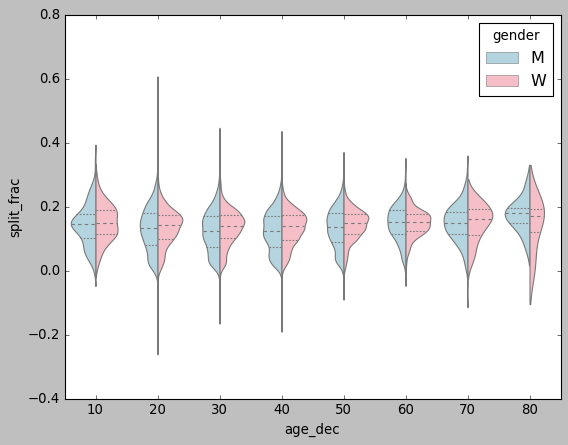

In [26]:
men = (data.gender == 'M')
women = (data.gender == 'W')

with sns.axes_style(style=None):
    sns.violinplot("age_dec", "split_frac", hue="gender", data=data,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);
    

In [27]:
(data.age > 80).sum()

7

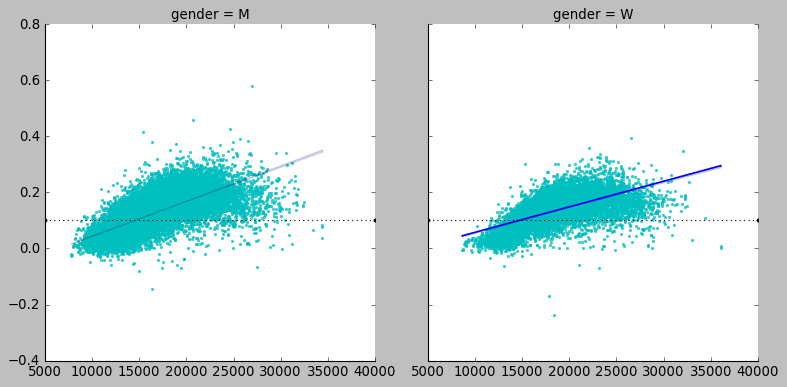

In [28]:
g = sns.lmplot('final_sec', 'split_frac', col='gender', data=data,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");